PROBABILITY DISTRIBUTION IN PYTHON

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
education_districtwise = pd.read_csv('education_districtwise.csv')
education_districtwise = education_districtwise.dropna()

<Axes: >

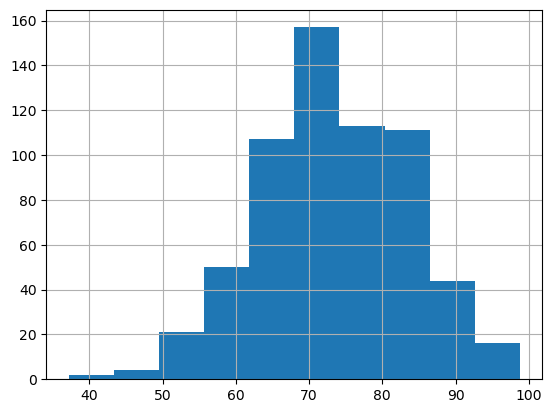

In [3]:
education_districtwise['OVERALL_LI'].hist() #plot a histogram

In [12]:
mean_overall_li = education_districtwise['OVERALL_LI'].mean()
mean_overall_li

73.320224

In [13]:
std_overall_li = education_districtwise['OVERALL_LI'].std()
std_overall_li

10.120713572618008

In [14]:
lower_limit = mean_overall_li - 1 * std_overall_li
upper_limit = mean_overall_li + 1 * std_overall_li
((education_districtwise['OVERALL_LI'] >= lower_limit) & 
 (education_districtwise['OVERALL_LI'] <= upper_limit)).mean()

0.6656

In [15]:
lower_limit = mean_overall_li - 2 * std_overall_li
upper_limit = mean_overall_li + 2 * std_overall_li
((education_districtwise['OVERALL_LI'] >= lower_limit) & (education_districtwise['OVERALL_LI'] <= upper_limit)).mean()

0.9536

In [16]:
lower_limit = mean_overall_li - 3 * std_overall_li
upper_limit = mean_overall_li + 3 * std_overall_li
((education_districtwise['OVERALL_LI'] >= lower_limit) & (education_districtwise['OVERALL_LI'] <= upper_limit)).mean()

0.9968

In [17]:
education_districtwise['Z_SCORE'] = stats.zscore(education_districtwise['OVERALL_LI'])
education_districtwise


,AC_YEAR,STATCD,DISTCD,STATNAME,DISTNAME,DISTRICTS,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,...,UUNI_SC,UUNI_ST,TOTCLS1G,TOTCLS2G,TOTCLS3G,TOTCLS4G,TOTCLS5G,TOTCLS6G,TOTCLS7G,Z_SCORE
0,2015-16,1,101,JAMMU & KASHMIR,KUPWARA,1,13,391,104,875564.0,...,26,2594,3489,5315,27,62,23,852,239,-0.632895
1,2015-16,1,102,JAMMU & KASHMIR,BARAMULA,1,18,678,144,1015503.0,...,0,1571,4127,5800,210,53,30,1665,360,-0.631906
2,2015-16,1,103,JAMMU & KASHMIR,SRINAGAR,1,8,94,65,1269751.0,...,31,408,817,3284,886,11,0,2873,40,-0.208672
3,2015-16,1,104,JAMMU & KASHMIR,BADGAM,1,13,523,104,735753.0,...,18,857,2290,3837,119,45,8,1035,325,-1.516940
4,2015-16,1,105,JAMMU & KASHMIR,PULWAMA,1,8,359,64,570060.0,...,17,855,1688,2584,151,67,5,1101,209,-0.822757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,2015-16,36,3606,TELANGANA,RANGA REDDY,1,37,876,137,5296396.0,...,25534,9457,7224,8298,529,0,121,15458,3337,0.467711
676,2015-16,36,3607,TELANGANA,MAHBUBNAGAR,1,64,1458,230,4042191.0,...,31001,14590,8936,7007,179,0,44,3730,3327,-1.706801
677,2015-16,36,3608,TELANGANA,NALGONDA,1,59,1117,216,3483648.0,...,26577,14015,7592,4534,103,0,208,4026,3049,-0.817813
678,2015-16,36,3609,TELANGANA,WARANGAL,1,51,993,211,3522644.0,...,23172,23525,6674,4677,153,0,207,7035,3060,-0.708049


In [18]:
education_districtwise[(education_districtwise['Z_SCORE'] > 3) | (education_districtwise['Z_SCORE'] < -3)]

,AC_YEAR,STATCD,DISTCD,STATNAME,DISTNAME,DISTRICTS,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,...,UUNI_SC,UUNI_ST,TOTCLS1G,TOTCLS2G,TOTCLS3G,TOTCLS4G,TOTCLS5G,TOTCLS6G,TOTCLS7G,Z_SCORE
434,2015-16,22,2216,CHHATTISGARH,DANTEWADA,1,4,360,53,532791.0,...,441,6897,1908,433,85,589,34,79,38,-3.030890
494,2015-16,23,2349,MADHYA PRADESH,ALIRAJPUR,1,6,612,62,728677.0,...,930,24493,4864,381,59,1473,2,35,0,-3.569821


ACTIVITY PROBABILITY DISTRIBUTION

In [22]:
#Step 1 imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

In [24]:
data = pd.read_csv("modified_c4_epa_air_quality.csv") #load the data

In [25]:
#Step 2 Data exploration
# Display the first 10 rows of the data
print(data.head(10))


   date_local    state_name   county_name      city_name  \
0  2018-01-01       Arizona      Maricopa        Buckeye   
1  2018-01-01          Ohio       Belmont      Shadyside   
2  2018-01-01       Wyoming         Teton  Not in a city   
3  2018-01-01  Pennsylvania  Philadelphia   Philadelphia   
4  2018-01-01          Iowa          Polk     Des Moines   
5  2018-01-01        Hawaii      Honolulu  Not in a city   
6  2018-01-01        Hawaii      Honolulu  Not in a city   
7  2018-01-01  Pennsylvania          Erie           Erie   
8  2018-01-01        Hawaii      Honolulu       Honolulu   
9  2018-01-01      Colorado       Larimer   Fort Collins   

                                     local_site_name   parameter_name  \
0                                            BUCKEYE  Carbon monoxide   
1                                          Shadyside  Carbon monoxide   
2  Yellowstone National Park - Old Faithful Snow ...  Carbon monoxide   
3                             North East Waste 

In [30]:
# Display number of rows and number of columns
num_rows, num_columns = data.shape
num_rows

260

In [31]:
num_columns

8

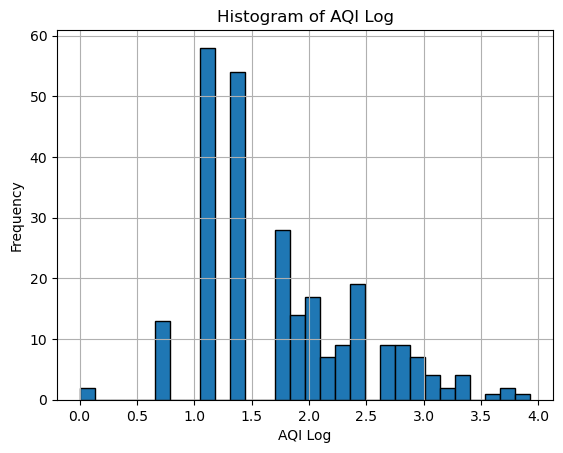

In [33]:
# Create a histogram to visualize the distribution of 'aqi_log'

plt.hist(data['aqi_log'].dropna(), bins=30, edgecolor='black')  # Drop NaNs to avoid errors
plt.xlabel('AQI Log')
plt.ylabel('Frequency')
plt.title('Histogram of AQI Log')
plt.grid(True)
plt.show()

Step 3 Statistical tests

In [34]:
# Calculate the mean of 'aqi_log'
mean_aqi_log = data['aqi_log'].mean()

# Print out the mean
print("Mean of AQI Log:", mean_aqi_log)

Mean of AQI Log: 1.7669210929985582


In [35]:
std_aqi_log = data['aqi_log'].std()
std_aqi_log

0.7147155520223721

In [37]:
# Define lower limit (1 standard deviation below the mean)
lower_limit = mean_aqi_log - std_aqi_log

# Define upper limit (1 standard deviation above the mean)
upper_limit = mean_aqi_log + std_aqi_log

lower_limit

1.052205540976186

In [38]:
upper_limit

2.4816366450209304

In [39]:
# Calculate the proportion of data within the limits
proportion_within_limits = ((data['aqi_log'] >= lower_limit) & (data['aqi_log'] <= upper_limit)).mean()

# Convert proportion to percentage
percentage_within_limits = proportion_within_limits * 100

percentage_within_limits

76.15384615384615

In [44]:
## Display the actual percentage of data that falls within 2 standard deviations of the mean.
# Define lower limit (2 standard deviations below the mean)
lower_limit = mean_aqi_log - 2 * std_aqi_log

# Define upper limit (2 standard deviations above the mean)
upper_limit = mean_aqi_log + 2 * std_aqi_log

print(lower_limit)
print(upper_limit)

0.3374899889538139
3.1963521970433026


In [43]:
# Define variable for lower limit, 3 standard deviations below the mean.
# Define variable for upper limit, 3 standard deviations above the mean.
# Display lower_limit, upper_limit.

# Define lower limit (3 standard deviations below the mean)
lower_limit = mean_aqi_log - 3 * std_aqi_log

# Define upper limit (3 standard deviations above the mean)
upper_limit = mean_aqi_log + 3 * std_aqi_log
print(lower_limit)
print(upper_limit)

-0.37722556306855815
3.9110677490656744


In [45]:
# Display the actual percentage of data that falls within 3 standard deviations of the mean.

# Calculate the proportion of data within these limits
proportion_within_limits = ((data['aqi_log'] >= lower_limit) & (data['aqi_log'] <= upper_limit)).mean()

# Convert proportion to percentage
percentage_within_limits = proportion_within_limits * 100
percentage_within_limits

95.76923076923077

In [46]:
# Compute the z-score for every aqi_log value, and add a column named z_score in the data to store those results.
# Display the first 5 rows to ensure that the new column was added

# Compute the z-score for each value in 'aqi_log'
data['z_score'] = (data['aqi_log'] - mean_aqi_log) / std_aqi_log

# Display the first 5 rows to verify that the new column was added
print(data.head())

   date_local    state_name   county_name      city_name  \
0  2018-01-01       Arizona      Maricopa        Buckeye   
1  2018-01-01          Ohio       Belmont      Shadyside   
2  2018-01-01       Wyoming         Teton  Not in a city   
3  2018-01-01  Pennsylvania  Philadelphia   Philadelphia   
4  2018-01-01          Iowa          Polk     Des Moines   

                                     local_site_name   parameter_name  \
0                                            BUCKEYE  Carbon monoxide   
1                                          Shadyside  Carbon monoxide   
2  Yellowstone National Park - Old Faithful Snow ...  Carbon monoxide   
3                             North East Waste (NEW)  Carbon monoxide   
4                                          CARPENTER  Carbon monoxide   

    units_of_measure   aqi_log   z_score  
0  Parts per million  2.079442  0.437265  
1  Parts per million  1.791759  0.034753  
2  Parts per million  1.098612 -0.935070  
3  Parts per million  1.3862

In [47]:
# Display data where `aqi_log` is above or below 3 standard deviations of the mean

# Filter the data where 'aqi_log' is outside 3 standard deviations from the mean
filtered_data = data[(data['aqi_log'] < lower_limit) | (data['aqi_log'] > upper_limit)]

# Display the filtered data
print(filtered_data)

     date_local    state_name       county_name       city_name  \
25   2018-01-01        Nevada             Clark       Las Vegas   
46   2018-01-01    California         Riverside       Mira Loma   
106  2018-01-01    California          Imperial        Calexico   
131  2018-01-01       Arizona          Maricopa         Phoenix   
132  2018-01-01    California       Los Angeles         Compton   
136  2018-01-01  Pennsylvania              York            York   
152  2018-01-01     Louisiana  East Baton Rouge     Baton Rouge   
155  2018-01-01       Arizona          Maricopa         Phoenix   
177  2018-01-01    California       Los Angeles      Long Beach   
206  2018-01-01    California    San Bernardino  San Bernardino   
244  2018-01-01       Arizona          Maricopa         Phoenix   

                                  local_site_name   parameter_name  \
25                                  Sunrise Acres  Carbon monoxide   
46                          Mira Loma (Van Buren)  Carb